# Zonal Mean Temperature

Calculating the zonal mean of a quantity

In [1]:
%matplotlib inline

from cosima_cookbook import get_nc_variable, expts
from cosima_cookbook import memory

import matplotlib.pyplot as plt

/mnt/miniconda3/envs/cosima/lib/python3.6/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


Zonal mean allow us to look at the ocean in cross-section. In this diagnostics, we calculate the time averaged, zonal mean temperature field.

In [7]:
@memory.cache
def calc_zonal_mean_temp(expt, n=1):
    print('Calculating {} zonal_mean_temp'.format(expt))
    
    if expt == 'mom01v5/KDS75':
        ncfile = 'ocean_month.nc'
    else:
        ncfile = 'ocean.nc'
        
    zonal_temp = get_nc_variable(expt, ncfile, 'temp',
                                 chunks={'st_ocean': None},
                                 n=n)
    
    zonal_mean_temp = zonal_temp.mean('xt_ocean').mean('time')
    
    zonal_mean_temp.load()
    
    return zonal_mean_temp

In this example, we assume that the cells are all of the same thickness in the $x$ direction. It would be accurate to perform a weighted average using the `dzt` field.

In [8]:
def plot_zonal_mean_temp(zonal_mean_temp):
    zonal_mean_temp.plot()
    plt.gca().invert_yaxis()
    plt.title('{}: Zonal Mean Temp'.format(expt))

Calculating mom01v5/GFDL50 zonal_mean_temp
Calculating mom01v5/KDS75 zonal_mean_temp
Calculating mom01v5/KDS75_PI zonal_mean_temp
Calculating mom01v5/KDS75_UP zonal_mean_temp
Calculating mom01v5/KDS75_wind zonal_mean_temp
Calculating mom025/mom025_jra_ryf0304 zonal_mean_temp
Calculating mom025/mom025_jra_ryf8485 zonal_mean_temp
Calculating mom025/mom025_jra_ryf9091 zonal_mean_temp
Calculating mom025/mom025_nyf zonal_mean_temp
Calculating mom025/mom025_nyf_salt zonal_mean_temp


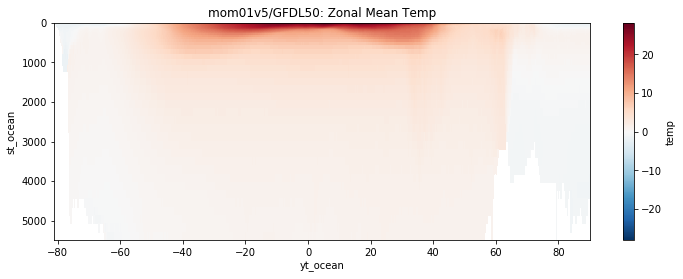

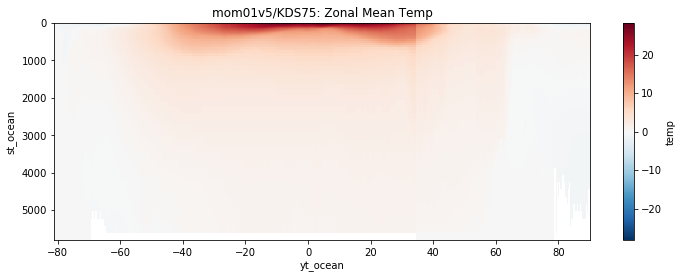

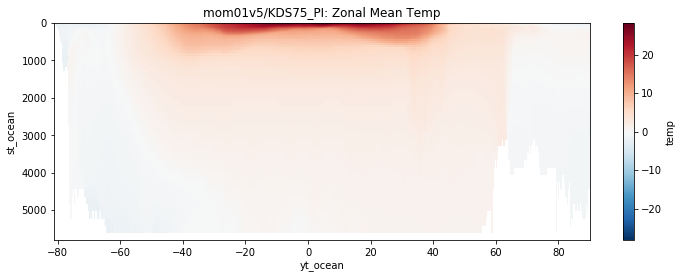

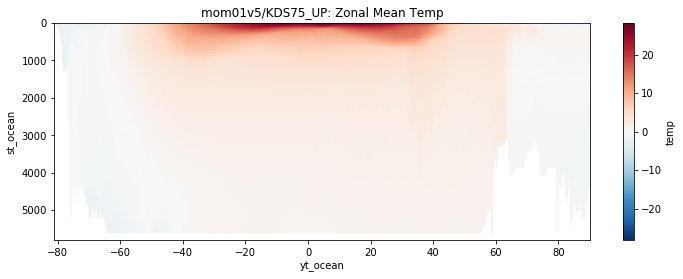

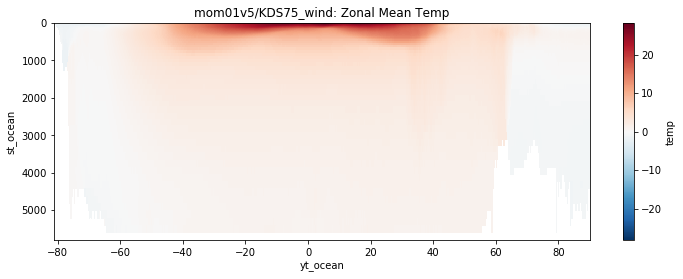

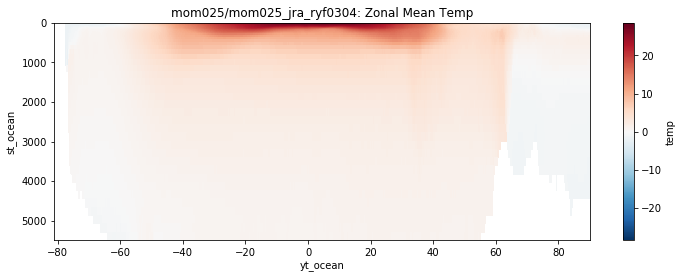

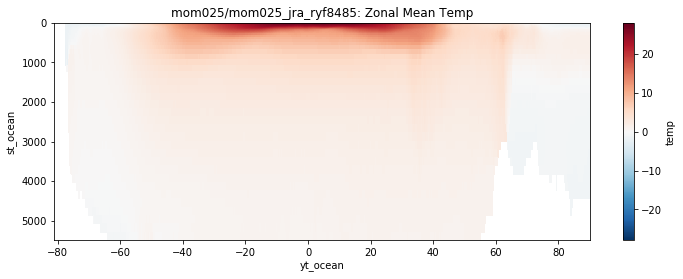

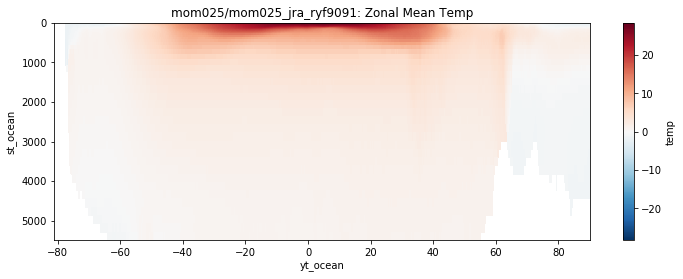

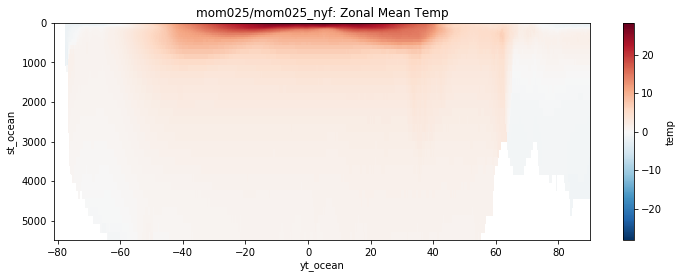

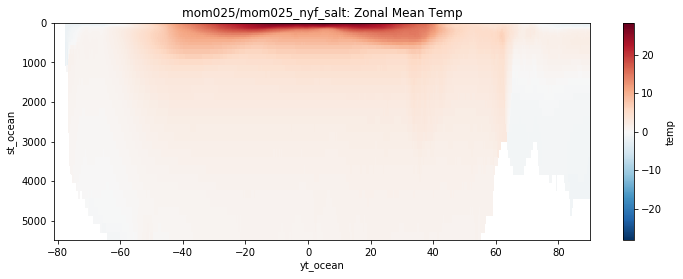

In [9]:
for expt in expts: 
    plt.figure(figsize=(12,4))
    zonal_mean_temp = calc_zonal_mean_temp(expt)
    plot_zonal_mean_temp(zonal_mean_temp)

In [7]:
zonal_temp

<xarray.DataArray 'temp' (time: 6, st_ocean: 75, yt_ocean: 2700, xt_ocean: 3600)>
dask.array<concatenate, shape=(6, 75, 2700, 3600), dtype=float64, chunksize=(1, 75, 300, 400)>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 -279.6 -279.5 -279.4 ...
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 -80.98 -80.94 -80.9 ...
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 4.332 5.869 7.569 9.447 ...
  * time      (time) object  109-07-16 12:00:00  109-08-16 12:00:00 ...
    geolon_t  (time, yt_ocean, xt_ocean) float64 nan nan nan nan nan nan nan ...
    geolat_t  (time, yt_ocean, xt_ocean) float64 nan nan nan nan nan nan nan ...
Attributes:
    long_name:      Potential temperature
    units:          degrees C
    valid_range:    [ -10.  500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature